In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

c:\Users\stijn\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the CSV data into a pandas DataFrame
df = pd.read_csv('merged_data.csv')
# Display the first few rows of the DataFrame
print(df.head())

              DateTime  MeanEnergyConsumption  temperature_2m  precipitation  \
0  2011-11-23 09:00:00               0.355000            4.25            0.0   
1  2011-11-23 10:00:00               0.174500            6.80            0.0   
2  2011-11-23 11:00:00               0.134000            8.35            0.0   
3  2011-11-23 12:00:00               0.451857            9.45            0.0   
4  2011-11-23 13:00:00               0.288000           10.10            0.0   

   cloud_cover  cloud_cover_low  cloud_cover_mid  cloud_cover_high  is_day  \
0    30.300001              1.0              0.0              98.0     1.0   
1    30.600000              1.0              0.0              99.0     1.0   
2    31.800000              3.0              0.0              97.0     1.0   
3    35.400000              6.0              0.0             100.0     1.0   
4    53.400000             26.0              0.0             100.0     1.0   

   sunshine_duration  
0          2924.7007  
1   

In [3]:
# Assume 'date_time' is the column in your DataFrame that contains the date and time information
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set 'date_time' as the index of the DataFrame
df.set_index('DateTime', inplace=True)

In [4]:
print(df.head())
print(df.columns)

                     MeanEnergyConsumption  temperature_2m  precipitation  \
DateTime                                                                    
2011-11-23 09:00:00               0.355000            4.25            0.0   
2011-11-23 10:00:00               0.174500            6.80            0.0   
2011-11-23 11:00:00               0.134000            8.35            0.0   
2011-11-23 12:00:00               0.451857            9.45            0.0   
2011-11-23 13:00:00               0.288000           10.10            0.0   

                     cloud_cover  cloud_cover_low  cloud_cover_mid  \
DateTime                                                             
2011-11-23 09:00:00    30.300001              1.0              0.0   
2011-11-23 10:00:00    30.600000              1.0              0.0   
2011-11-23 11:00:00    31.800000              3.0              0.0   
2011-11-23 12:00:00    35.400000              6.0              0.0   
2011-11-23 13:00:00    53.400000        

In [5]:
# Now 'time_series' has a DatetimeIndex
time_series = df.index.to_series()

In [6]:
# Resample the time series to an hourly frequency
time_series = time_series.resample('H').mean()

C:\Users\stijn\AppData\Local\Temp\ipykernel_13296\1577080521.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_series = time_series.resample('H').mean()


In [7]:
# Define the order parameters for the ARIMA model and the seasonal component
# These are just example values - you'll need to choose appropriate values based on your data
order = (1, 0, 1)
seasonal_order = (1, 1, 1, 24)

In [8]:
# Convert the time_series to numeric, coercing non-numeric values to NaN
time_series = pd.to_numeric(time_series, errors='coerce')

# Handle NaN values. Here, we're filling them with the mean of the other values
# You might want to handle them differently depending on your specific dataset and problem
time_series.fillna(time_series.mean(), inplace=True)

In [9]:
print(time_series)

DateTime
2011-11-23 09:00:00    1322038800000000000
2011-11-23 10:00:00    1322042400000000000
2011-11-23 11:00:00    1322046000000000000
2011-11-23 12:00:00    1322049600000000000
2011-11-23 13:00:00    1322053200000000000
                              ...         
2014-02-27 20:00:00    1393531200000000000
2014-02-27 21:00:00    1393534800000000000
2014-02-27 22:00:00    1393538400000000000
2014-02-27 23:00:00    1393542000000000000
2014-02-28 00:00:00    1393545600000000000
Freq: h, Name: DateTime, Length: 19864, dtype: int64


In [10]:
# # Fit the SARIMA model
# model = sm.tsa.statespace.SARIMAX(time_series, order=order, seasonal_order=seasonal_order)
# results = model.fit()
# Fit the model
model = sm.tsa.statespace.SARIMAX(df['MeanEnergyConsumption'], order=order, seasonal_order=seasonal_order)
results = model.fit()

c:\Users\stijn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\stijn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:              MeanEnergyConsumption   No. Observations:                19864
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 24)   Log Likelihood               61374.028
Date:                            Sat, 09 Mar 2024   AIC                        -122738.057
Time:                                    13:25:46   BIC                        -122698.579
Sample:                                11-23-2011   HQIC                       -122725.136
                                     - 02-28-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7892      0.003    282.977      0.000       0.784       0.795
ma.L1          0.1395      0.003   

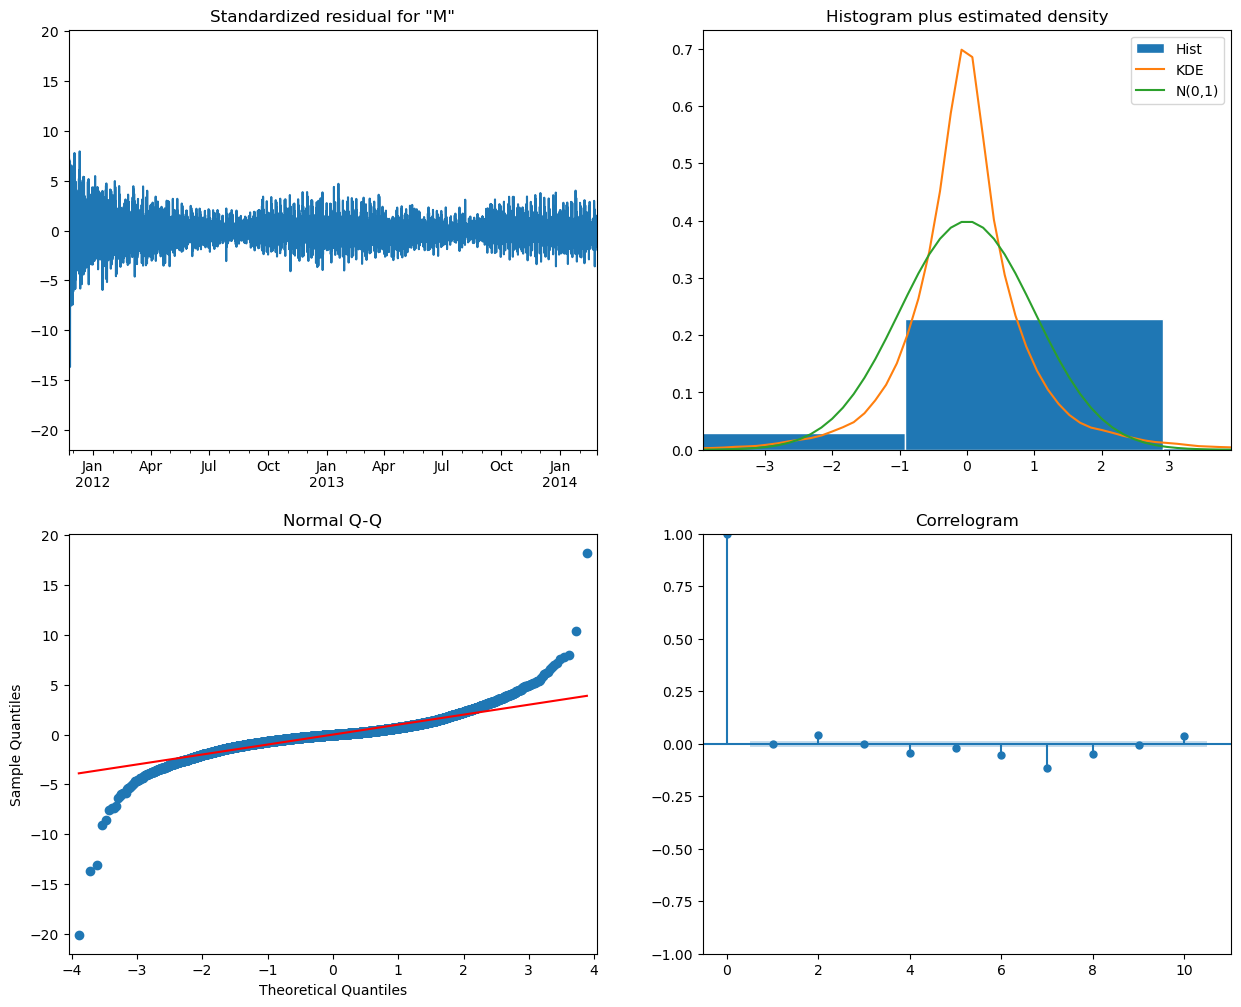

In [11]:
# Print the model summary
print(results.summary())
# Plot diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

C:\Users\stijn\AppData\Local\Temp\ipykernel_13296\1720164006.py:9: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  plt.plot(df['MeanEnergyConsumption'].last('7D'), label='Actual data')


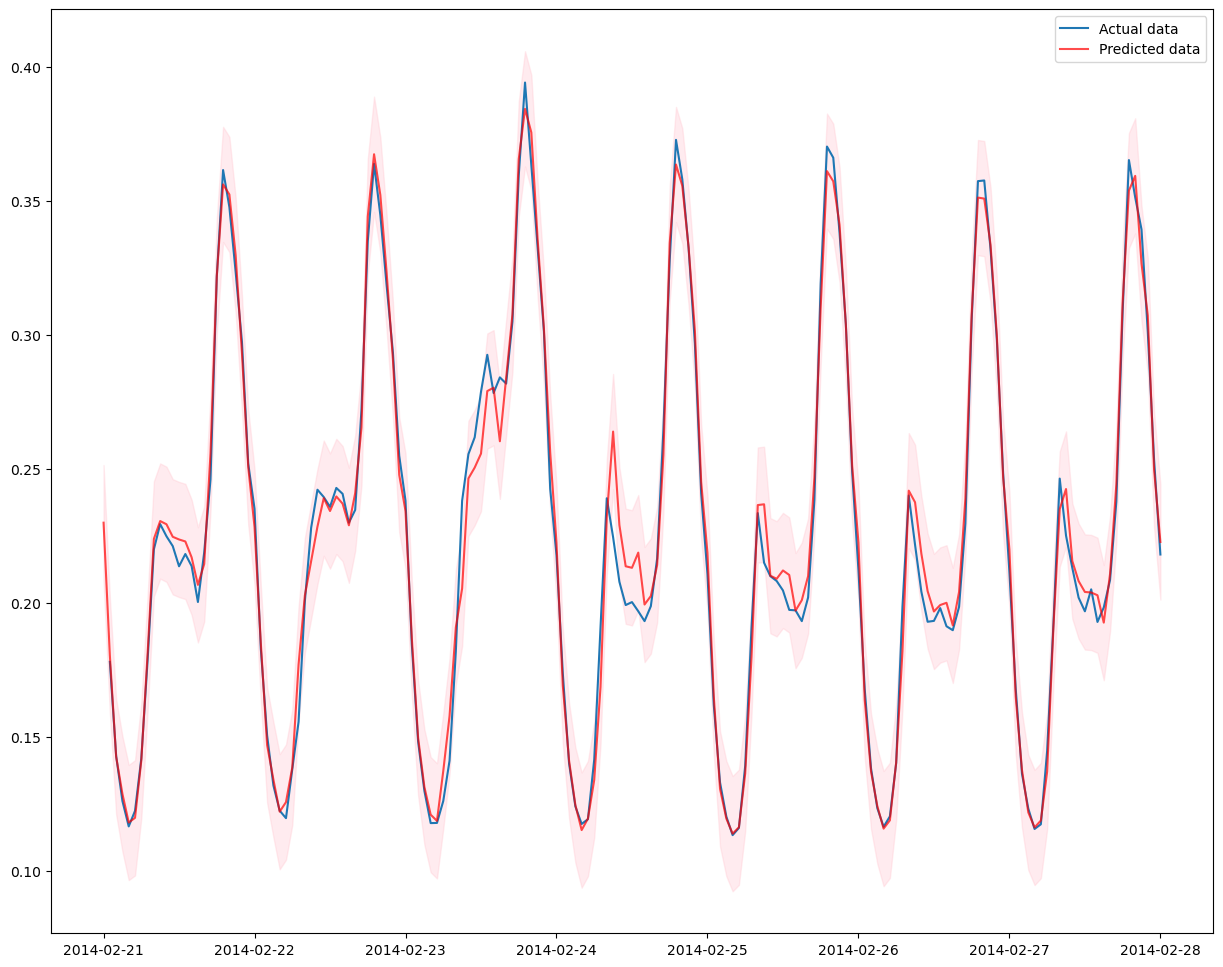

In [12]:
# Get predictions and confidence intervals
pred = results.get_prediction(start=pd.to_datetime('2014-02-21 00:00:00'), dynamic=False)
pred_conf = pred.conf_int()

# Plot the data
plt.figure(figsize=(15, 12))

# Plot the actual data
plt.plot(df['MeanEnergyConsumption'].last('7D'), label='Actual data')

# Plot the predicted data
plt.plot(pred.predicted_mean, color='red', label='Predicted data', alpha=.7)

# Plot the confidence intervals
plt.fill_between(pred_conf.index,
                 pred_conf.iloc[:, 0],
                 pred_conf.iloc[:, 1], color='pink', alpha=.3)

# Add a legend
plt.legend()

plt.show()